# Decision Trees and Random Forest

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [187]:
data = pd.read_csv('kyphosis.csv')

In [188]:
data.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

## EDA

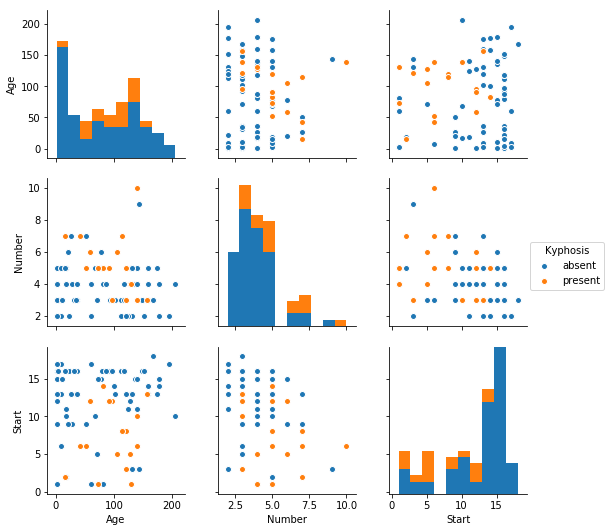

In [189]:
sns.pairplot(data, hue = 'Kyphosis')

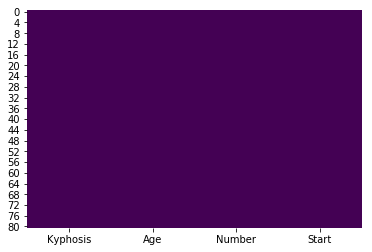

In [190]:
sns.heatmap(data.isnull(), cbar = False, cmap = 'viridis')

No data missing.

### Mapping Kyphosis column to 0 or 1

In [191]:
def kypho(value):
    if value == 'absent':
        return 0
    else:
        return 1

In [192]:
data['kyphosis'] = data['Kyphosis'].apply(kypho)

In [193]:
data = data.drop('Kyphosis',axis = 1)

In [194]:
data.head()

Age  Number  Start  kyphosis
0   71       3      5         0
1  158       3     14         0
2  128       4      5         1
3    2       5      1         0
4    1       4     15         0

### Splitting the data

In [195]:
X = data.iloc[:,:-1]

In [196]:
Y = data.iloc[:,-1]

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [199]:
from sklearn.tree import DecisionTreeClassifier

In [200]:
classifier = DecisionTreeClassifier()

In [201]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [202]:
Y_pred = classifier.predict(X_test)

In [203]:
from sklearn.metrics import  confusion_matrix,classification_report

In [204]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[14  3]
 [ 6  2]]
             precision    recall  f1-score   support

          0       0.70      0.82      0.76        17
          1       0.40      0.25      0.31         8

avg / total       0.60      0.64      0.61        25



## Random Forests

In [205]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
rclassifier = RandomForestClassifier(n_estimators=200)

In [207]:
rclassifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [208]:
Y_pred = rclassifier.predict(X_test)

In [209]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[17  0]
 [ 7  1]]
             precision    recall  f1-score   support

          0       0.71      1.00      0.83        17
          1       1.00      0.12      0.22         8

avg / total       0.80      0.72      0.64        25



As we can see the accuracy increased by using Random Forests.  

In [210]:
data['kyphosis'].value_counts()

0    64
1    17
Name: kyphosis, dtype: int64

As we can see that difference in observation causes unbalanced data which should be taken in consideration while comparing **Decision Trees** and **Random Forests**.